In [ ]:
# 8월 28일

# UnSupervised Learning(비지도학습)
- Supervised Learning(지도학습) : 문제(데이터)와 정답이 주어짐
- UnSupervised Learning(비지도학습) : 문제(데이터)만 주어짐 => 사람이 분류하기 어려운 것
- Clustering(군집) / Classification(분류)

## Kmeans
**원리**
- K : 군집의 개수(정수)  => 사람이 지정해줌(너무 작은 값을 선택하면 유용한 정보를 놓칠 수 있고, 너무 큰 값을 선택하면 불필요한 복잡성이 추가됨)

- Means : (거리의) 평균 => 군집의 중심점에서 각 데이터(점)간의 거리 => 중심점 이동시 거리 다시 잼(반복을 통해 진짜 중심점을 찾아나감) => 군집 재배치됨
- Centroid : 각 군집의 중심점 => 아무거나 지정하여 시작
- 중심점으로부터 각 점의 거리를 비교하여 가까운 군집에 점이 포함된다
- 군집의 각 점의 평균(Mean) 위치로 Centroid가 이동한다
- 위의 2개 과정이 반복되어 중심점이 고정되어 간다
- Centroid의 위치가 변동이 없을 때까지 반복하여 학습이 종료된다 

# K-Means 클러스터링 알고리즘을 사용할 때 군집의 개수 K는 사용자가 정해야 하는 하이퍼파라미터입니다. 
- 이것은 알고리즘의 성능과 클러스터링 결과에 큰 영향을 미치는 중요한 결정 사항 중 하나입니다.

- K 값을 어떻게 선택하느냐는 다양한 방법과 판단 기준이 있습니다. 몇 가지 일반적인 방법은 다음과 같습니다:

- 엘보우 메서드 (Elbow Method): 이 방법은 K 값을 변화시키면서 클러스터 내 제곱 거리의 합 (SSE - Sum of Squared Errors)을 계산하고,
    SSE가 감소하는 속도가 둔화되는 지점을 찾는 것입니다. 이 지점이 "팔꿈치"처럼 꺾이는 지점으로 선택할 수 있습니다.

- 실루엣 분석 (Silhouette Analysis): 실루엣 점수는 클러스터링 결과의 품질을 측정하는 데 사용되며,
    각 데이터 포인트가 자신의 클러스터에 대해 얼마나 잘 맞는지를 나타냅니다. 높은 실루엣 점수를 가진 K를 선택합니다.

- Gap Statistics: 실제 데이터와 유사한 무작위 데이터 집합을 생성하여 비교하고, 클러스터링 결과의 품질을 평가합니다.
    K 값에 대한 Gap 통계량을 사용하여 적절한 K 값을 선택합니다.

- 도메인 지식 및 목적: 데이터와 관련된 도메인 지식이나 분석 목적에 따라 K를 선택할 수 있습니다. 
    때로는 K 값을 미리 알고 있는 경우도 있습니다.

- K 값을 선택하는 것은 클러스터링의 결과를 어떻게 해석하고 사용할 것인지에 큰 영향을 미치므로 주의 깊게 고려해야 합니다. 
일반적으로 여러 가지 방법을 시도하고 결과를 비교하여 적절한 K 값을 결정하는 것이 좋습니다.

In [1]:
# 데이터 준비
# 데이터의 샘플수: 200, 변수의 개수:2, Centroid:3  
# make_blocks() 활용
# DaraFrame 표시
# 산점도에 색상별로 표시

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터 셋 준비
from sklearn.datasets import make_blobs   # blobs는 작은 구체' 또는 '덩어리'라는 뜻

In [4]:
# 테스트 위해 데이터 인위적으로 만들기

X, y = make_blobs(n_samples=200, centers=3, n_features=2, random_state=0)   # X, y는 ndarray 배열임
X.shape, y.shape   # ((200, 2), (200,))   => 2차원, 1차원
# 배열의 차원은 array 배열 내부의 대괄호 수나 .shape 메소드를 통해 확인
# array() 이거 써 있는 것은 배열을 나타내는 건데 그건 차원하고 관계 없음

# 이 때의 샘플 y값을 비지도학습을 위해 학습시키지 않으면 됨

((200, 2), (200,))

In [18]:
df = pd.DataFrame({'x1':X[:,0], 'x2':X[:,1], 'target':y})   # X[:,0] => 1차원,  X[:,1] => 1차원
df

,x1,x2,target
0,-1.733808,3.798061,2
1,0.628358,4.460136,0
2,1.131218,4.681950,0
3,-1.429179,3.500836,2
4,1.274508,5.630173,0
...,...,...,...
195,3.181903,-0.182268,1
196,-2.210915,4.577433,2
197,2.965446,1.214882,1
198,1.289338,3.449692,0


In [26]:
# 위 내용을 이렇게 해도 됨 - 강사님 버전  target이 0번, 1번, 2번 그룹으로 나뉨

df = pd.DataFrame(X, columns=['x1', 'x2']) # 이것만 실행시 컬럼은 'x1'과 'x2' 이렇게 2개만 생김
df['target']=y              # y 컬럼이 target 명으로 만들어짐
df                          

,x1,x2,target
0,-1.733808,3.798061,2
1,0.628358,4.460136,0
2,1.131218,4.681950,0
3,-1.429179,3.500836,2
4,1.274508,5.630173,0
...,...,...,...
195,3.181903,-0.182268,1
196,-2.210915,4.577433,2
197,2.965446,1.214882,1
198,1.289338,3.449692,0


In [19]:
df.isnull().sum()

x1        0
x2        0
target    0
dtype: int64

In [16]:
df['target'].value_counts()

0    67
1    67
2    66
Name: target, dtype: int64

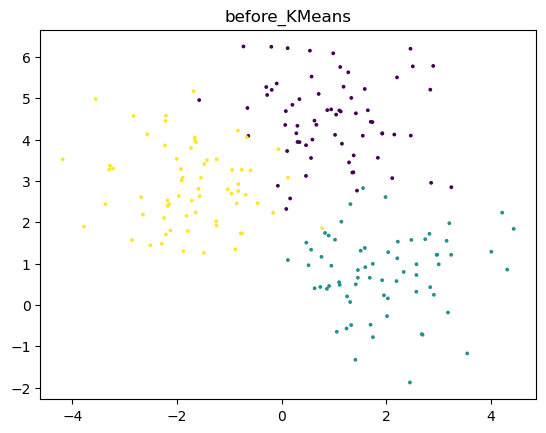

In [17]:
# 학습 전 데이터 시각화

plt.scatter(X[:,0],X[:,1], c=y, s=3)  # 시스템에서 만들어준 데이터
plt.title('before_KMeans')
plt.show()

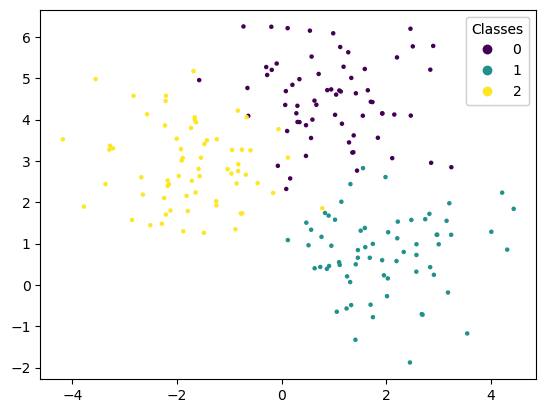

In [29]:
# 학습 전 데이터 시각화 -  강사님 버전

fig, ax = plt.subplots()
scatter = ax.scatter(df['x1'], df['x2'], s=5, c=df['target'])
legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.add_artist(legend)

plt.show()                                                               # 위 내용을 이렇게 해도 됨 - 강사님 버전

In [ ]:
# 학습 전 데이터 시각화 -  강사님 버전

fig, ax = plt.subplots()
scatter = ax.scatter(df['x1'], df['x2'], s=5, c=df['target'])
legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.add_artist(legend)

plt.show()  

In [ ]:
fig, ax = plt.subplots()
scatter = ax.scatter(df['x1'], df['x2'], s=5, c=df['target'])
legend = ax.legend(*scatter.legend_elements(), lod="upper right", title="Cla")

In [102]:
# 35번 셀 오류 해결 위한 내용임. 윈도우 환경변수 설정을 변경 또는 아래와 같이 코드 추가
# C:\Users\201-17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
import os    
os.environ["OMP_NUM_THREADS"]="1"   # 알려진 메모리 누수 방지

import warnings
warnings.filterwarnings('ignore')   # 경고창도 안 보이게 하기 위함

In [91]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=0)   # 차트를 보고 육안에 의해 최적의 분류가 3으로 보이므로 3을 지정해 나누었음
km

KMeans(n_clusters=3, random_state=0)

In [92]:
pred = km.fit_predict(X)   # 학습한 다음에 추정하란 의미
pred

# 102번 셀 없이 이 셀을 실행 또는 환경변수 설정 변경 없이 이 셀을 실행하면 경고창 뜨는데 
# K-Means 알고리즘을 실행할 때 발생하는 것으로, 주로 Windows 운영체제와 Intel Math Kernel Library (MKL)를 사용하는 환경에서 발생. 
# 이러한 경고 메시지는 일반적으로 성능 문제에 관련된 것이며, 처리 속도가 느려질 수 있다는 것을 나타냄.
# MKL을 사용할 때 K-Means 알고리즘이 메모리 누수(memory leak)를 발생시킬 수 있는데, 
# 이를 방지하기 위해 주피터 노트북 셀에다가 하거나 또는 윈도우 환경 변수 설정에서 
# OMP_NUM_THREADS를 1로 설정해야 문제 발생 없음

array([1, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 2,
       0, 0, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0, 0, 2, 2, 1,
       2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2,
       0, 1, 2, 0, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2,
       2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 2, 1, 2, 2, 1, 2, 0, 2, 1, 1,
       2, 1, 0, 2, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2,
       0, 2])

In [93]:
pred.shape

(200,)

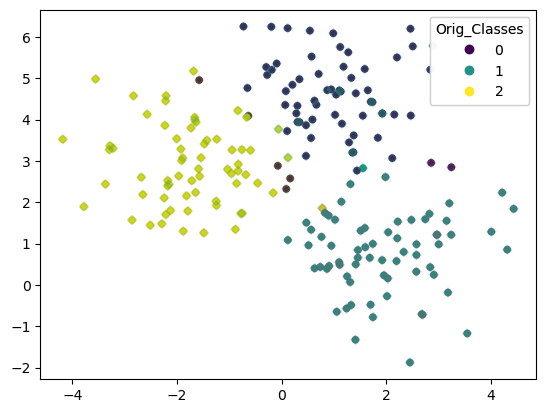

In [94]:
# 학습 전 데이터와 학습 후 데이터 같이 표시하기 
fig, ax = plt.subplots()
scatter_orig = ax.scatter(df['x1'], df['x2'], s=20, c=df['target'])
scatter_pred = ax.scatter(X[:, 0], X[:, 1], s=20, c=pred, cmap='Dark2', marker='D', alpha=0.3)

legend1 = plt.legend(*scatter_orig.legend_elements(), loc="upper right", title="Orig_Classes")
ax.add_artist(legend1)
plt.show()                                                              

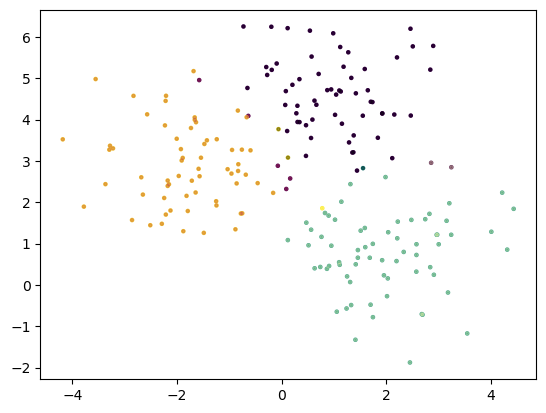

In [95]:
# 위의 내용 시각화 - 강사님 버전 (강사님 파일과 비교 필요)

fig = plt.figure()
ax1 = fig.add_subplot(111)   # subplot은 figure 안에 들어가는 서브 플롯(subplot)을 의미
# figure는 전체 그림(캔버스)를 나타내고, 이 그림 안에 하나 이상의 서브 플롯을 배치할 수 있음
ax1.scatter(df['x1'], df['x2'], s=5, c=df['target'])  # 학습 전 데이터
ax1.scatter(df['x1'], df['x2'], s=5, c=pred, cmap='inferno', label=pred, alpha=0.3)
plt.show()

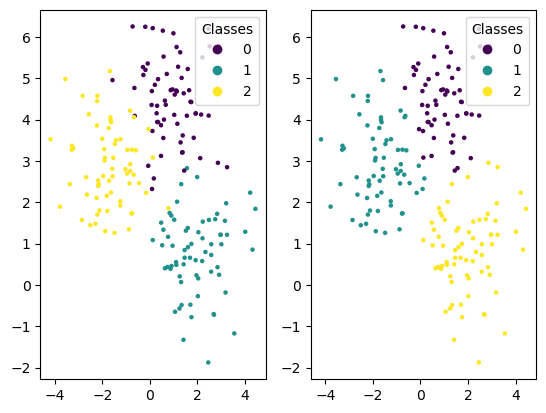

In [96]:
# 본래의 분류 데이터(학습 전)와 KMeans로 분류한 데이터를 나란히 나눠서 비교해보기

fig = plt.figure()   # 새로운 그림(Figure) 객체를 생성. 이 함수는 기본적으로 크기가 (6.4, 4.8) 인치인 그림을 생성
# 상하좌우로 차트를 나눠서 그릴 수 있는 것 중 121, 122는 상하좌우로 나누는 것.
# Figure 위에 subplot이나 차트가 그려질 때 해당 Figure의 크기 내에서 자동으로 위치가 조정
# subplot은 figure 안에 들어가는 서브 플롯(subplot)을 의미

ax1 = fig.add_subplot(121)  # 한 행을 2개로 나눠서 첫 번째 차트를 그릴 수 있는 axis 객체 
scatter1 = ax1.scatter(df['x1'], df['x2'], s=5, c=df['target'], label=df['target'])
legend = ax1.legend(*scatter1.legend_elements(), title="Classes", loc="upper right")

ax2 = fig.add_subplot(122)  # 한 행을 2개로 나눠서 두 번째 차트를 그릴 수 있는 axis 객체
scatter2 = ax2.scatter(df['x1'], df['x2'], s=5, c=pred, label=pred)
legend = ax2.legend(*scatter2.legend_elements(), title="Classes", loc="upper right")

In [97]:
km.cluster_centers_   # 중심점 3개 확인

array([[ 0.97692125,  4.56883102],
       [-1.71656153,  2.91261167],
       [ 1.98410174,  0.81302038]])

In [98]:
centroid = km.cluster_centers_ 

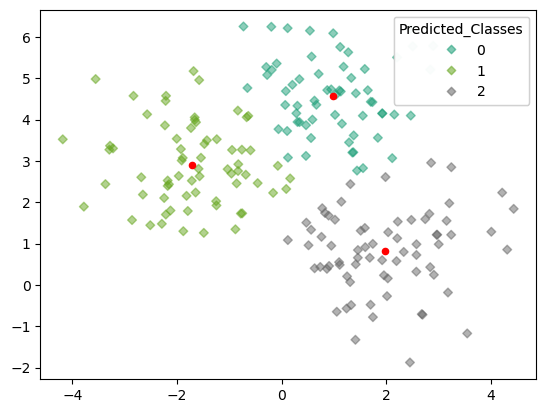

In [99]:
# 문제) Kmeans의 분류를 산점도로 화면에 표시하고 그 위에 각 centroid를 적색으로 표시하기

fig, ax = plt.subplots()

# 학습된 데이터를 산점도로 표시
scatter_pred = ax.scatter(X[:, 0], X[:, 1], s=20, c=pred, cmap='Dark2', marker='D', alpha=0.5)

# 센트로이드를 레드 점으로 표시
scatter_centroid = ax.scatter(centroid[:, 0], centroid[:, 1], c='red', s=20, marker='o', label='Centroid')

# legend를 추가
legend1 = ax.legend(*scatter_pred.legend_elements(), loc="upper right", title="Predicted_Classes")
ax.add_artist(legend1)

plt.show()


In [100]:
type(km.cluster_centers_), km.cluster_centers_.shape   

(numpy.ndarray, (3, 2))

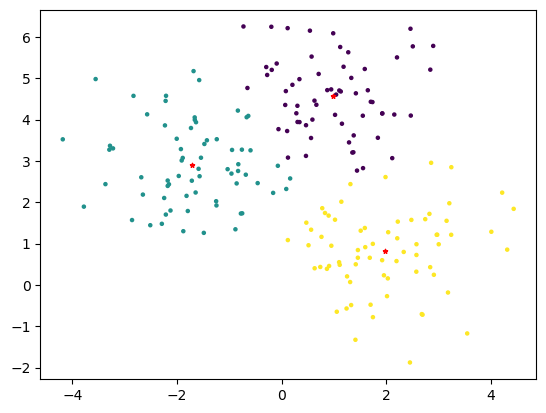

In [101]:
# 문제) Kmeans의 분류를 산점도로 화면에 표시하고 그 위에 각 centroid를 적색으로 표시하기

# 강사님 버전
plt.scatter(df['x1'], df['x2'], c=pred, s=5)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='r', marker='*', s=10)
plt.show()

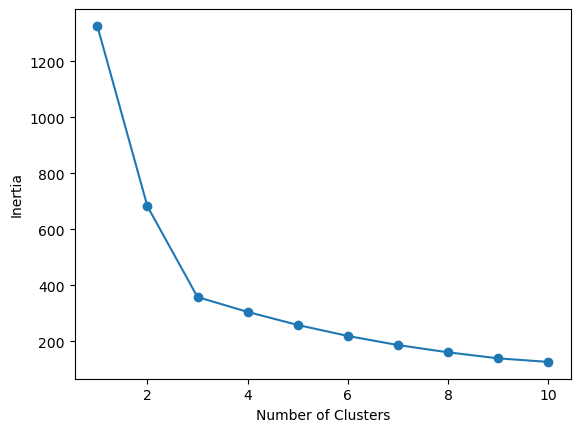

In [103]:
# 엘보우 차트를 통해 최적의 K값을 확인한다 (사람이 특징을 파악하는 게 아닌 계산에 의해서 K를 몇 개로 하면 좋은지 확인시켜줌)
# => km = KMeans(n_clusters=3, random_state=0)  : n_clusters의 값을 뭘로 정하면 좋을지 '계산'에 의해서 군집을 나눠줌

# inertia : 센트로이드에서 각 점들의 거리의 제곱의 합을 의미함(잘 나눠졌다면 거리의 제곱의 합들이 급격히 떨어지는 좌표가 있음)
# => 급격히 떨어지는 좌표가 최적의 클러스터 수가 됨
# 엘보우 차트 : 샌트로이드 수와 inertia의 값을 차트에 표시
# 곡선이 급격히 꺾이는 부분의 샌트로이드 수가 최적의 K값이 된다(팔꿈치 부분) ('K값'='센트로이드 수'='클러스터 수')

Inertia = []
for i in range(1,11):   # 10번 루프로 inertia 10개 생성
    km = KMeans(n_clusters=i , random_state=0)
    km.fit(X)
    Inertia.append(km.inertia_)

plt.plot(range(1,11), Inertia, marker='o')    
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')  
plt.show()     # 3에서 급격히 변화

In [168]:
# 실제 데이터를 이용해 클러스터 분류!!!!!!!!!

df = pd.read_csv('https://cwisky.github.io/public/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [190]:
# 실제 데이터를 이용해 클러스터 분류!!!!!!!!!

df = pd.read_csv('https://cwisky.github.io/public/Iris.csv', index_col='Id')
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [191]:
df2 = df.to_csv('data/Species.csv')
print('파일 생성 성공')

파일 생성 성공


In [193]:
df2=pd.read_csv('data/Species.csv', index_col='Id')
df2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


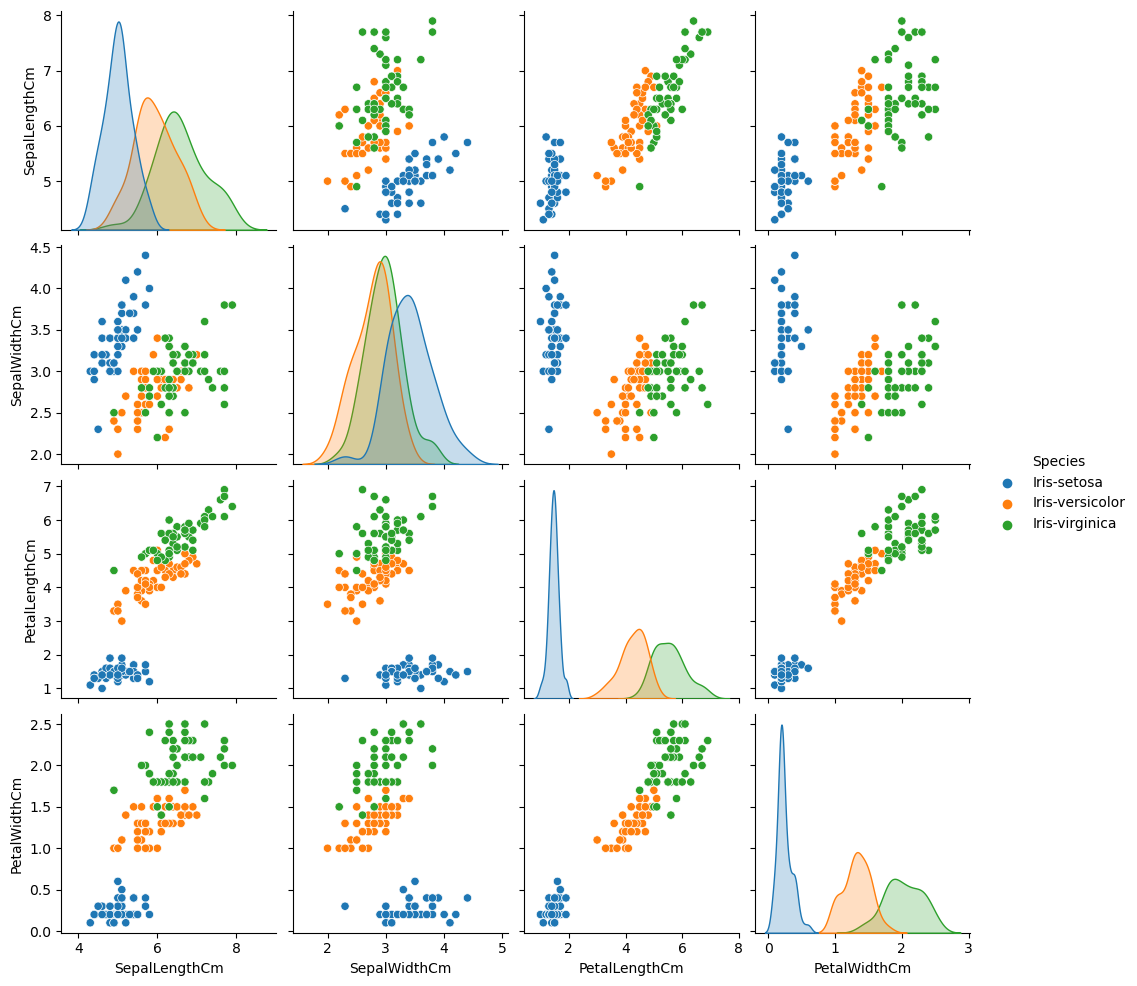

In [194]:
#분류에 영향이 비교적 큰 변수를 찾아본다

import seaborn as sns
sns.pairplot(df, hue='Species')
plt.show()

In [195]:
df2['target']=df2['Species']
df2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica


In [196]:
del df2['Species']   # 원본 삭제됨
df2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [ ]:
# 또는 삭제시

'''
df2.drop('y', axis=1, inplace=True)
df2 
'''
# => 이렇게 하거나

'''
df2['target'] = df2['y']

df3 = df2.drop('y', axis=1)
df3
'''
# 이렇게 사본을 생성한 걸 df3에 할당해 새로운 데이터 프레임 생성해야 함


In [197]:
df2.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
target           0
dtype: int64

In [198]:
df3 = pd.get_dummies(df2)
df3

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target_Iris-setosa,target_Iris-versicolor,target_Iris-virginica
Id,,,,,,,
1,5.1,3.5,1.4,0.2,1,0,0
2,4.9,3.0,1.4,0.2,1,0,0
3,4.7,3.2,1.3,0.2,1,0,0
4,4.6,3.1,1.5,0.2,1,0,0
5,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,0,0,1
147,6.3,2.5,5.0,1.9,0,0,1
148,6.5,3.0,5.2,2.0,0,0,1


In [199]:
# 'target'의 빈도수

df3.value_counts('target_Iris-versicolor')

target_Iris-versicolor
0    100
1     50
dtype: int64

In [200]:
# 'target'의 빈도수

df3.value_counts('target_Iris-virginica')

target_Iris-virginica
0    100
1     50
dtype: int64

In [201]:
# 'target'의 빈도수
df3.value_counts('target_Iris-setosa')

target_Iris-setosa
0    100
1     50
dtype: int64

In [202]:
# df3의 상관관계 확인

corr_matrix = df3.corr()
corr_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target_Iris-setosa,target_Iris-versicolor,target_Iris-virginica
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,-0.717416,0.079396,0.638020
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,0.595601,-0.464700,-0.130901
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,-0.922688,0.201587,0.721102
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,-0.887510,0.118376,0.769134
target_Iris-setosa,-0.717416,0.595601,-0.922688,-0.887510,1.000000,-0.500000,-0.500000
target_Iris-versicolor,0.079396,-0.464700,0.201587,0.118376,-0.500000,1.000000,-0.500000
target_Iris-virginica,0.638020,-0.130901,0.721102,0.769134,-0.500000,-0.500000,1.000000


In [204]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=0)   # 품종이 3개라서 n_clusters=3
km

KMeans(n_clusters=3, random_state=0)

In [205]:
pred = km.fit_predict(X)   # 학습한 다음에 추정하란 의미
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

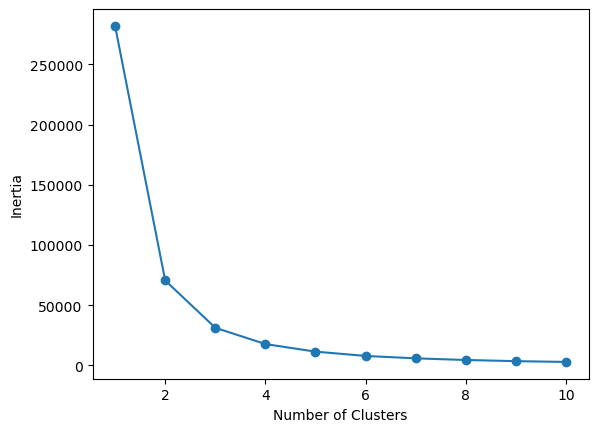

In [206]:
Inertia = []
for i in range(1,11):   # 10번 루프로 inertia 10개 생성
    km = KMeans(n_clusters=i , random_state=0)
    km.fit(X)
    Inertia.append(km.inertia_)

plt.plot(range(1,11), Inertia, marker='o')    
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')  
plt.show()  

In [207]:
X = df3.drop(columns=['target_Iris-versicolor'])  # 컬럼 수가 많을 때에는 각 컬럼 명시 방법보다 제거하려는 컬럼만 drop에 넣고 제외하여 저장.  
y = df3['target_Iris-versicolor']

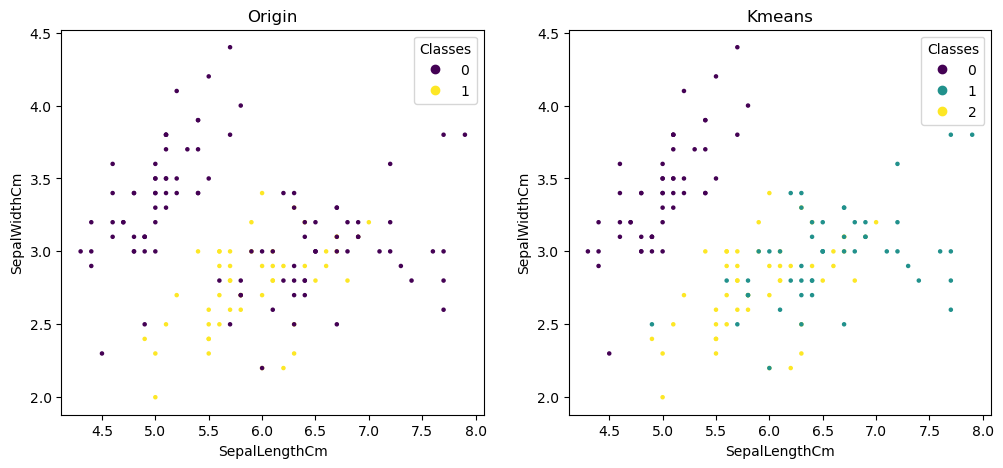

In [208]:
# 본래의 분류 데이터(학습 전)와 KMeans로 분류한 데이터를 나란히 나눠서 비교해보기

fig = plt.figure(figsize=(12, 5))  # 그림 크기 지정

# 첫 번째 서브 플롯 (좌측)
ax1 = fig.add_subplot(121)
plt.title('Origin')
scatter1 = ax1.scatter(df3['SepalLengthCm'], df3['SepalWidthCm'], s=5, c=df3['target_Iris-versicolor'], label='Original')
legend1 = ax1.legend(*scatter1.legend_elements(), title="Classes", loc="upper right")
ax1.set_xlabel('SepalLengthCm')
ax1.set_ylabel('SepalWidthCm')

# 두 번째 서브 플롯 (우측)
ax2 = fig.add_subplot(122)
plt.title('Kmeans')
scatter2 = ax2.scatter(df3['SepalLengthCm'], df3['SepalWidthCm'], s=5, c=pred, label='KMeans')
legend2 = ax2.legend(*scatter2.legend_elements(), title="Classes", loc="upper right")
ax2.set_xlabel('SepalLengthCm')
ax2.set_ylabel('SepalWidthCm')

plt.show()

In [209]:
# 강사님 버전- 위와 전혀 다름


# iris.csv 의 데이터를 KMeans로 분류하기
# data url : https://cwisky.github.io/public/Iris.cvs

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [218]:
df = pd.read_csv('https://cwisky.github.io/public/Iris.csv', index_col='Id')  # 아이리스(붓꽃) 데이터
# index_col='Id' => 이렇게 인덱스 컬럼이 있으니 별도로 인덱스가 필요 없어서 인덱스 컬럼을 지정해줌 
# 꽃잎과 꽃받침의 폭과 넓이
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


# 이 데이터셋은 아이리스 꽃에 대한 정보를 담고 있습니다. 각 변수는 다음과 같은 의미를 가지고 있습니다:

- SepalLengthCm: 꽃받침의 길이 (단위: cm)
- SepalWidthCm: 꽃받침의 너비 (단위: cm)
- PetalLengthCm: 꽃잎의 길이 (단위: cm)
- PetalWidthCm: 꽃잎의 너비 (단위: cm)
- Species: 아이리스 종류

- 아래는 각 특성에 대한 추가 설명입니다:
- 꽃받침(Sepal): 이는 식물에서 꽃을 보호하고 지탱하는 역할을 하는 부분입니다.
- 꽃잎(Petal): 이는 식물에서 주로 색상을 띠며, 벌 등의 곤충들을 유인하는 역할을 합니다.
- Species: 이 데이터셋에서 사용되는 Species에는 세 가지 종류가 있습니다 - Iris-setosa, Iris-versicolor, Iris-virginica.
- 따라서 이 데이터셋은 아이리스 꽃에 대해 각 품종별로 4개의 특성(꽃받침 길이와 너비, 그리고 꽃잎 길이와 너비)을 측정한 것입니다.

In [220]:
df['Species'].value_counts()   # 3가지 품종(세 개의 각 품종에 50개의 데이터 품종이 있음) => 총 150개

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

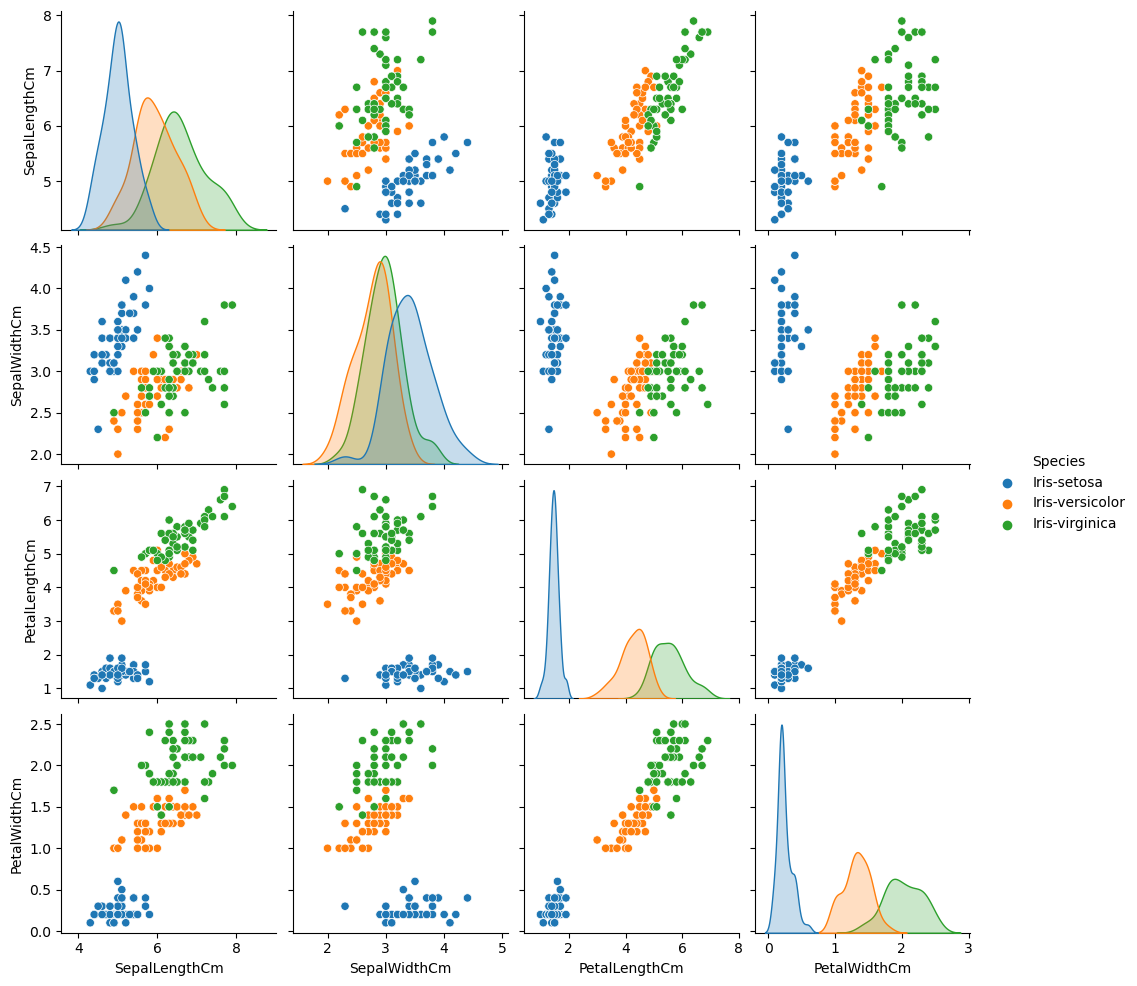

In [228]:
#분류에 영향이 비교적 큰 변수를 찾아본다  (강사님은 target까지 나오게 해두심)
import seaborn as sns

# 2차원으로 차트화하니 변수(컬럼)가 네 개라 네 개 모두 동시에 차트화할 수 없어서
# pairplot함수를 이용해 각 컬럼 간에 어떤 컬럼이 분류에 영향이 큰 지를 알려줌(모든 컬럼을 1대 1로 비교)
sns.pairplot(df, hue='Species')  # 각 변수 네 개들을 각 컬럼에 일일이 짝을 맞춰서 비교해 봄 => 16개의 차트가 나옴
# 이를 통해 어떤 게 분류에 영향이 큰 지를 알 수 있게 함
#  hue='Species' => Species 컬럼을 색으로 표시하라는 의미임
plt.show()


# 차트를 통해 SepalLengthCm과 PetalLengthCm이 깔끔하게 분류되는 것을 보아 두 항목이 분류하는데 상당한 도움이 되는 것을 알 수 있음

In [222]:
km = KMeans(n_clusters=3, random_state=0)   # 품종이 세 개라 cluster는 개발자가 바꿀 수 없고 지정되어 있으므로 3을 그대로 써줌
km

KMeans(n_clusters=3, random_state=0)

In [223]:
# 문제만 주기 => 추정을 한 분류를 pred로 변수명 만들어 할당

pred = km.fit_predict(df.drop('Species', axis=1)) # 정답을 주지 않고 값을 추정해 분류 한 것(drop('Species' 이렇게 정답을 떨궈냄)

In [230]:
# pred(추정을 한 분류)를 가지고 실제 분류와의 차이 확인을 위해 데이터 프레임을 다시 생성

df2 = df.drop('Species', axis=1)  # 데이터 프레임에서 'Species' 컬럼을 버림
# KMeans가 추정한 값을 target 컬럼을 생성해 할당시킴
df2['target'] = pred
df2.head()   #0,1,2로 분류됨(여기선 head만 가져왔음)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
Id,,,,,
1,5.1,3.5,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1
3,4.7,3.2,1.3,0.2,1
4,4.6,3.1,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1


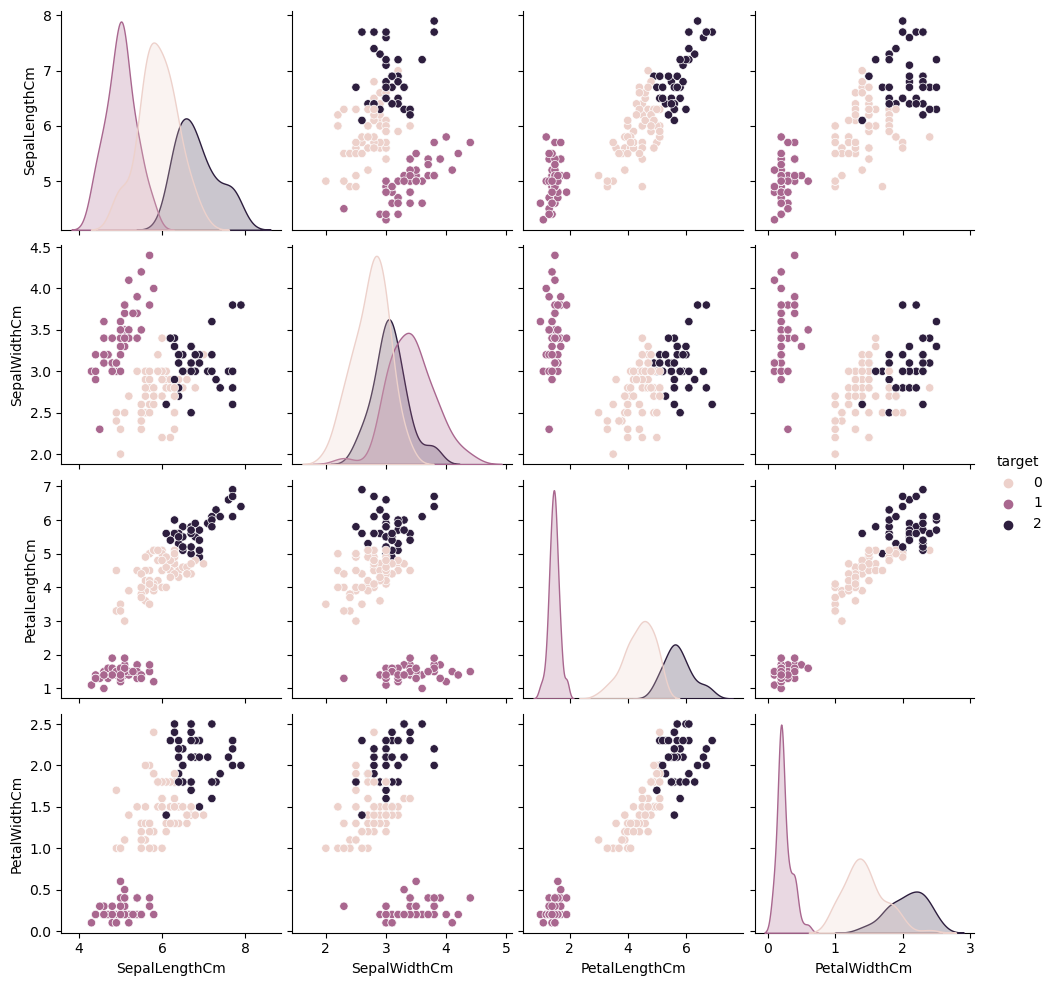

In [216]:
# KMeans가 추정 분류한 데이터와 위에서의 실제 데이터와 차트로 비교해보기
# 위의 내용과 비슷한 것을 알 수 있음

sns.pairplot(df2, hue='target')
# 분류가 잘 나눠져 있지 않는다면 그 차트에 해당하는 X와 Y축에 해당하는 변수명만으로는 분류를 제대로 할 수 없다는 의미
# 산 모양 그래프는 자기 자신에 대한 그래프인데 빈도수를 의미하며 각 품종별로 해당 변수에 대한 빈도수를 의미
# => 폭이 좁을수록 해당 변수에 대해 해당 품종이 한 곳에 집중되어 있음을 알 수 있음
# => 폭이 넓으면 해당 변수에 대해 해당 품종이 골고루 퍼져 있음을 알 수 있음
plt.show()

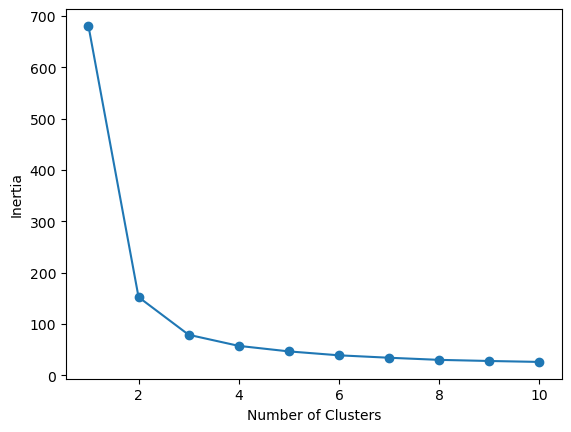

In [225]:
# 정답을 모른다고 했을 대 위의 붓꽃 품종을 몇 개의 품종으로 구분을 해야 적절한 지(클러스터를 몇 개로 해야할 지 ) 
# 확인이 필요하다고 했을 때 엘보우 차트 이용하기 

inertia = []
for i in range(1,11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df.drop('Species', axis=1))   #  여기는 정답이 있어서 km.fit(df.drop('Species', axis=1)) => 정답을 버리고 문제만 준 것
    inertia.append(km.inertia_)
    
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()   # Number of Clusters가 3에서 급경사로 확인됨(팔꿈치 부분) 